# DNA Structure Generation Tutorial

Welcome to the DNA structure generation tutorial using the MDNA module. This notebook will guide you through various ways to generate and manipulate DNA structures. You'll learn to:
- Generate DNA sequences from scratch.
- Use custom sequences and define DNA topology to manipulate the linking number
- Apply custom shapes using control points
- Visualize and save DNA structures.


In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns

import mdna

/Users/thor/surfdrive/Projects/mdna/mdna/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/mdna/mdna/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


## Basic DNA Structure Generation
We start by generating a basic DNA structure using default settings, which outputs a DNA sequence known as the Drew Dickerson dodecamer.

In [2]:
# Build DNA with nothing, will output Drew Dickerson dodecamer DDD sequence
dna = mdna.make()
dna.describe()

Default sequence: CGCGAATTCGCG
Number of base pairs: 12 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 12

DNA structure with 12 base pairs
Sequence: CGCGAATTCGCG
Trajectory not loaded
Frames:  (12, 1, 4, 3)


In [3]:
view = nv.show_mdtraj(dna.get_traj().atom_slice(dna.get_traj().top.select('resid 1 22')))
view

NGLWidget()

### Specifying a Sequence
You can specify a DNA sequence directly when generating the structure. Note, this will by default generate a linear strand of DNA.

In [4]:
# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

DNA structure with 10 base pairs
Sequence: GCGCGCGCGC
Trajectory not loaded
Frames:  (10, 1, 4, 3)


### Generating DNA with Specific Base Pairs
Generate a DNA structure with a defined number of base pairs, resulting in a random sequence.

In [5]:
# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()

Random sequence: GTCGTGGGAA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

DNA structure with 10 base pairs
Sequence: GTCGTGGGAA
Trajectory not loaded
Frames:  (10, 1, 4, 3)


### Creating Circular DNA Structures
Generate circular DNA structures, commonly known as minicircles.

Random sequence: CGGAACAGACACCGACATTGGAATGTGAAGTAGGTAGCGCGGACCTTAAACCCTGGCGCGGGGTTCTATAATGTGCCGGTGACTTGTGGGGCAGGTCCCGGTTCTTCAGAGAACAGCGAATTCAGAGACAGGATGTACCACTAATAGTTTTATAAGTGACTATAATTCCAACCATTTATAGGGGAACAGGGTCGTACATG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

using numba
Lk, Wr, Tw [20.  0. 20.]


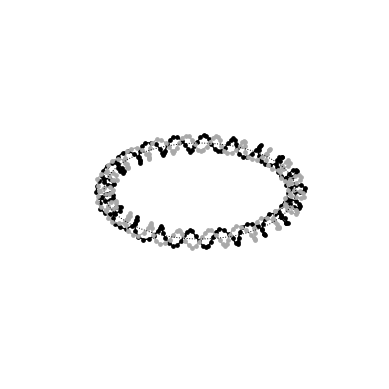

In [6]:
# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200, circular=True)
print('Lk, Wr, Tw', dna.get_linking_number())
dna.draw()

#### Minimizing the DNA structure

After generating the structure, you can minimize it to find a more energetically favorable conformation. The resulting structure is an idealized minicircle, however, if we can also minimize the DNA configuration using Monte Carlo (MC) simulations using a twistable worm like chain (TWLC) model of dsDNA. 


Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: True
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 29
   bp per EV bead:     7
   Effective size:     3.57
   Exclusion distance: 4.0
######################################


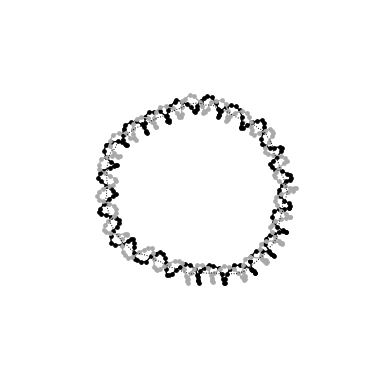

In [7]:
# Let's also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# Or save it to a file
dna.save_pdb('./pdbs/minimized_nbp_200_closed.pdb')

### Modifying Linking Number
Change the linking number by underwinding or overwinding the DNA using the `dLk` parameter. Note, to equilibrate the writhe use `equilibrate_writhe=True`, otherwise the linking number of the topology will not be conserved.

In [15]:
# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200, circular=True, dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration,
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()

Random sequence: GTCGGACATCTCCACCTCATATCCTCTGACCACTGCCACACACGGGTTACGAATTTATGGGGCAGCCGGTGCTGACGCAGATGGATCCGTGGACGGCGACGCGCGCCCCATGACATGGCTGACCCACCGGGAATAGACGCATTGCCACTACTTTTTTGGTGTCGCTATGGACACATCGTACATCTCAATCTCTGTGTCCA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 8
	Current twist number: 20.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 50.40 degrees

Circular DNA structure with 200 base pairs
Sequence: GTCGGACATCTCCACCTCATATCCTCTGACCACTGCCACACACGGGTTACGAATTTATGGGGCAGCCGGTGCTGACGCAGATGGATCCGTGGACGGCGACGCGCGCCCCATGACATGGCTGACCCACCGGGAATAGACGCATTGCCACTACTTTTTTGGTGTCGCTATGGACACATCGTA

array([28.        ,  2.26205201, 25.73794799])

## Visualizing DNA Minimization
Use NGLview to visualize molecular dynamics and in our case the results of Monte Carlo minimization.

In [17]:
# visualize using nglview MC minimization
mc_traj = dna.get_MC_traj()
view = nv.show_mdtraj(mc_traj,gui=True)
view.clear()
view.add_ball_and_stick()
view

NGLWidget(max_frame=780)

## Using Custom Shapes 
Explore the use of custom shapes for DNA structures through control points, allowing complex configurations. The `Shapes` class contains many predefined parametric functions that describe common shapes in 3D space. Utilize custom shapes for DNA structure generation, including helical shapes and more. 

Random sequence: TACGATTTGCGAGCCCTCCAGCAGTGTTGCCTACCCCTGTGATACCATATCGCAGAAGTCGTAGGGCCAGGTCTCCGGCAGAGTATTAATTTATGGTCGAGTAGTAGATGCCAACTATTCGAGCGAGAACTAGCATAGTTTCTGAGAACAGAATACGATCCACCGTTGCCCACTTAGGAGTGGTATAGACGGCGAGCACGTTTGTATTTTCGCCTATCTGCAGGGCAGAAAAGCTTTATAGAGCTTAGACTTCTTCCCTAGGTGGGCGCCGTCTGGTCATACAAGGAATGAGCTCATACT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 300



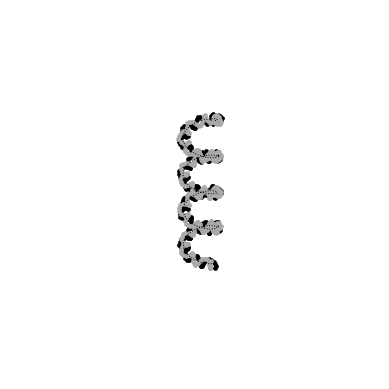

In [9]:
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3, pitch=5, radius=7, num_turns=4)
dna = mdna.make(n_bp=300, control_points=control_points)
dna.draw()

### Defining Complex Custom Shapes
Define intricate shapes by specifying control points manually. The points are used to fit a B-spline that goes through each of these points. Note, the minimum number of `control_points` to fit a spline through is 4.


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

DNA structure with 100 base pairs
Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Trajectory: <mdtraj.Trajectory with 1 frames, 4094 atoms, 200 residues, without unitcells>
Frames:  (100, 1, 4, 3)


'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'

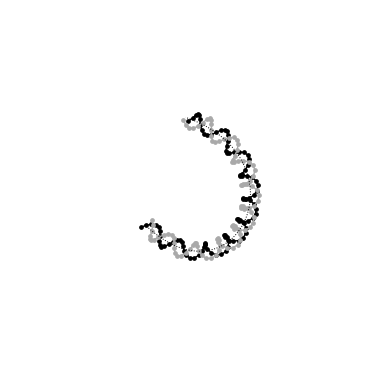

In [10]:
# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[20,4,60]])
dna = mdna.make(n_bp=100, control_points=control_points, sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence

## Extending DNA Sequences
We can use the custom shaped DNA structure to learn how to extend DNA sequences from both ends. By default the minimization is on using the `.extend()` function.

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 20
   bp per EV bead:     7
   Effective size:     3.573
   Exclusion distance: 4.0
######################################
Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 26
   bp per EV bead:     7
   Effective size:     3.591
   Exclusion distance: 4.0
###########################

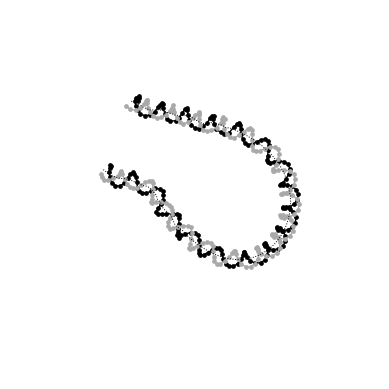

In [11]:
# We can also extend our DNA 
dna.extend(sequence=['G']*40)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*40, forward=False)
dna.draw()

## Connecting Two DNA Strands
Connect two separate DNA strands and visualize the configuration. This function will find the optimal number of basepairs to connect the two strands to minimize the twist. Alternatively you can also pass the `n_bp` or `control_points`.


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

Optimal BP: 54, Twist Difference per BP: 0.002 degrees
Optimal number of base pairs: 54

Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 56

Random sequence: CACATGGCCATACTCTTGCGAAGTCTATACGGTCGCACGACTAGTCCGGTGAAA 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300
Circular: False
DNA structure with 72 base pai

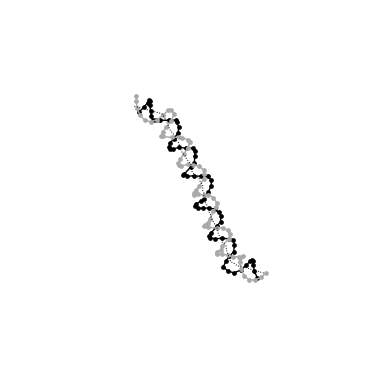

In [12]:
# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA', control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG', control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands
dna2 = mdna.connect(dna0, dna1)
dna2.draw()
dna2.describe()